## **Implementing a Perceptron using Tensors**

### **Installing Libraries and importing them**

In [1]:
# !conda install -c pytorch pytorch --yes

In [2]:
# !conda install -c conda-forge numpy pandas matplotlib --yes

In [3]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Loading the dataset**

In [4]:
df = pd.read_csv("perceptron_toydata-truncated.txt", sep = "\t")
df.head(5)

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0


In [9]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [10]:
X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

In [11]:
X_train[:5]

tensor([[ 0.7700, -1.1400],
        [-0.3300,  1.4400],
        [ 0.9100, -3.0700],
        [-0.3700, -1.9100],
        [-0.6300, -1.5300]], dtype=torch.float64)

In [12]:
# float32 are computationally less expensive as they are smaller and they fit the GPU memory if we have larger datasets
X_train = X_train.to(torch.float32)

### **Visualizing the dataset**

In [13]:
%matplotlib inline

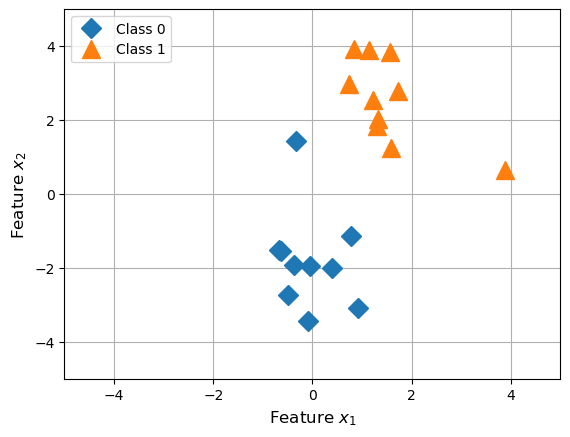

In [14]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()


### **Implementing the perceptron**

In [16]:
class OldPerceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = [0.0 for _ in range(num_features)]
        self.bias = 0.0

    def forward(self, x):
        weighted_sum_z = self.bias
        for i, _ in enumerate(self.weights):
            weighted_sum_z += x[i] * self.weights[i]

        if weighted_sum_z > 0.0:
            prediction = 1
        else:
            prediction = 0

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        for i, _ in enumerate(self.weights):
            self.weights[i] += error * x[i]

        return error

In [17]:
class Perceptron:
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = torch.zeros(num_features)
        self.bias = torch.tensor(0.0)

    def forward(self, x):
        weighted_sum_z = torch.dot(x, self.weights) + self.bias

        if weighted_sum_z > 0.0:
            prediction = torch.tensor(1.)
        else:
            prediction = torch.tensor(0.)

        return prediction

    def update(self, x, true_y):
        prediction = self.forward(x)
        error = true_y - prediction

        # update
        self.bias += error
        self.weights += error * x

        return error

### **Evaluating the results**

In [18]:
ppn = Perceptron(num_features = 2)

In [19]:
print(f"Weights: {ppn.weights}")
print(f"Bias: {ppn.bias}")

Weights: tensor([0., 0.])
Bias: 0.0


In [20]:
x = torch.tensor([1.1, 2.1])

In [21]:
ppn.forward(x)

tensor(0.)

In [22]:
ppn.update(x, true_y = 1)

tensor(1.)

In [23]:
print(f"Weights: {ppn.weights}")
print(f"Bias: {ppn.bias}")

Weights: tensor([1.1000, 2.1000])
Bias: 1.0


In [24]:
def train(model, all_x, all_y, epochs):
    for epoch in range(epochs):
        error_count = 0

        for x, y in zip(all_x, all_y):
            error = model.update(x, y)
            error_count += abs(error)

        print(f"Epoch: {epoch + 1}\tErrors: {error_count}")

In [25]:
ppn = Perceptron(num_features = 2)
train(
    model = ppn,
    all_x = X_train,
    all_y = y_train,
    epochs = 5
)

Epoch: 1	Errors: 1.0
Epoch: 2	Errors: 3.0
Epoch: 3	Errors: 1.0
Epoch: 4	Errors: 0.0
Epoch: 5	Errors: 0.0


In [26]:
def compute_accuracy(model, all_x, all_y):
    correct = 0.0

    for x, y in zip(all_x, all_y):
        prediction = model.forward(x)
        correct += int(prediction == y)

    return correct / len(all_y)

In [27]:
train_acc = compute_accuracy(ppn, X_train, y_train)
train_acc

1.0

In [28]:
print(f"Accuracy: {train_acc * 100}%")

Accuracy: 100.0%
